### Question
    Scipy:
    We have the min and max temperatures in a city In India for each months of the year.
    We would like to find a function to describe this and show it graphically, the dataset
    given below.
    Task:
    1. fitting it to the periodic function
    2. plot the fit
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

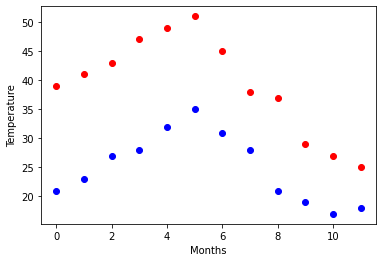

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)

plt.plot(months, Max,'ro')
plt.plot(months, Min, 'bo')
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.show()

In [6]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min, [-40, 20, 0])



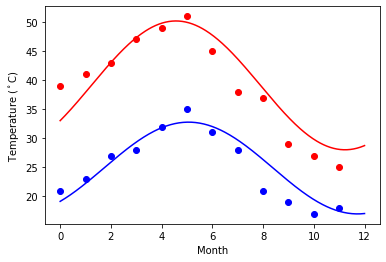

In [10]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

-----------------------------------------------------------------------------------------------------

### Question 2 :
    Matplotlib:
    This assignment is for visualization using matplotlib:
    data to use:
    url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
    titanic = pd.read_csv(url)
    Charts to plot:
    1. Create a pie chart presenting the male/female proportion
    2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
data = pd.read_csv(url)


In [14]:
counts = data['sex'].value_counts()
counts

male      843
female    466
Name: sex, dtype: int64

ValueError: 'c' argument has 1309 elements, which is inconsistent with 'x' and 'y' with size 1310.

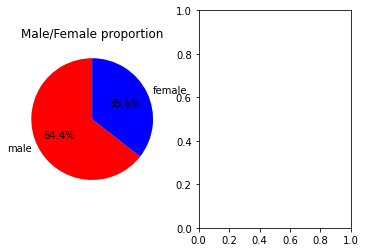

In [31]:
colors = ['red', 'blue']

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(counts.values.tolist(), labels=counts.index.values.tolist(), colors=colors,startangle=90,autopct='%.1f%%')
ax1.set_title('Male/Female proportion')


colors = {'male':'red', 'female':'blue'}
ax2.scatter(data.fare, data.age,c=data['sex'].iloc[:-1].apply(lambda x: colors[x]))
ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age')
